In [105]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [106]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [107]:
data = pd.read_csv("/content/gdrive/MyDrive/github/project/Candidate Resume Filtering using KNN Classifier/resume_data.csv")

In [108]:
print(data)

         Category                                             Resume
0    Data Science  Skills * Programming Languages: Python (pandas...
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2    Data Science  Areas of Interest Deep Learning, Control Syste...
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
..            ...                                                ...
957       Testing  Computer Skills: â¢ Proficient in MS office (...
958       Testing  â Willingness to accept the challenges. â ...
959       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960       Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961       Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...

[962 rows x 2 columns]


In [109]:
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [110]:
data.tail()

,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [111]:
data.shape

(962, 2)

In [112]:
data.columns

Index(['Category', 'Resume'], dtype='object')

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [114]:
data.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [115]:
data.isnull().sum()

Category    0
Resume      0
dtype: int64

In [116]:
data.nunique()

Category     25
Resume      166
dtype: int64

In [117]:
data['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [118]:
data.drop_duplicates(subset="Resume", keep='first', inplace=True)

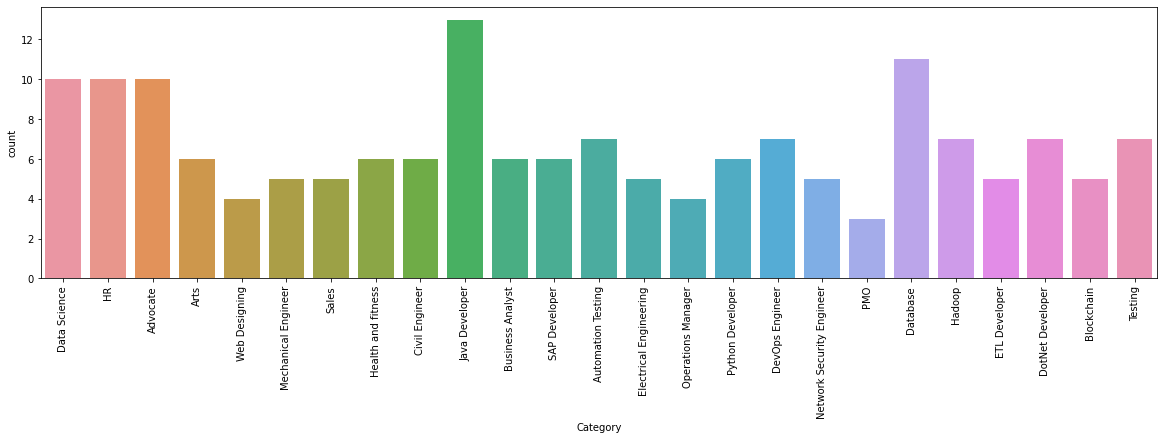

In [119]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=data)
plt.show()

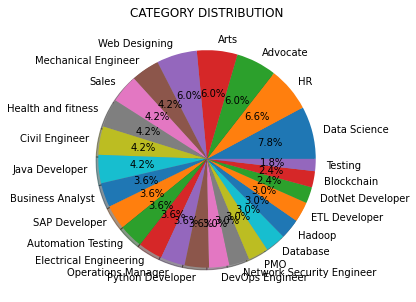

In [120]:
targetCounts = data['Category'].value_counts()
targetLabels  = data['Category'].unique()
plt.figure(figsize=(20,5))
plt.pie(targetCounts, labels=targetLabels, 
        autopct='%1.1f%%', shadow=True)
plt.title("CATEGORY DISTRIBUTION")
plt.show()

In [121]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
data['cleaned_resume'] = data.Resume.apply(lambda x: cleanResume(x))

In [122]:
data.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [123]:
data.tail()

,Category,Resume,cleaned_resume
894,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
895,Testing,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
896,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
897,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
898,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...,Skill Set OS Windows XP 7 8 8 1 10 Database MY...


In [124]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [125]:
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [126]:
SetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in SetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('Exprience', 616), ('company', 520), ('months', 515), ('Details', 510), ('description', 458), ('1', 348), ('Project', 299), ('data', 242), ('project', 231), ('6', 227), ('Maharashtra', 217), ('year', 215), ('SQL', 215), ('team', 207), ('Less', 199), ('using', 197), ('January', 189), ('Skill', 175), ('Management', 167), ('Ltd', 159), ('Pune', 158), ('C', 151), ('Education', 144), ('management', 143), ('Data', 140), ('Developer', 137), ('Engineering', 134), ('database', 133), ('Java', 130), ('Database', 127), ('monthsCompany', 125), ('System', 123), ('University', 123), ('Server', 123), ('Pvt', 122), ('India', 120), ('like', 118), ('The', 117), ('Responsibilities', 117), ('various', 116), ('A', 113), ('business', 113), ('2', 113), ('development', 112), ('reports', 111), ('application', 110), ('issues', 106), ('system', 106), ('Mumbai', 106), ('Test', 105)]


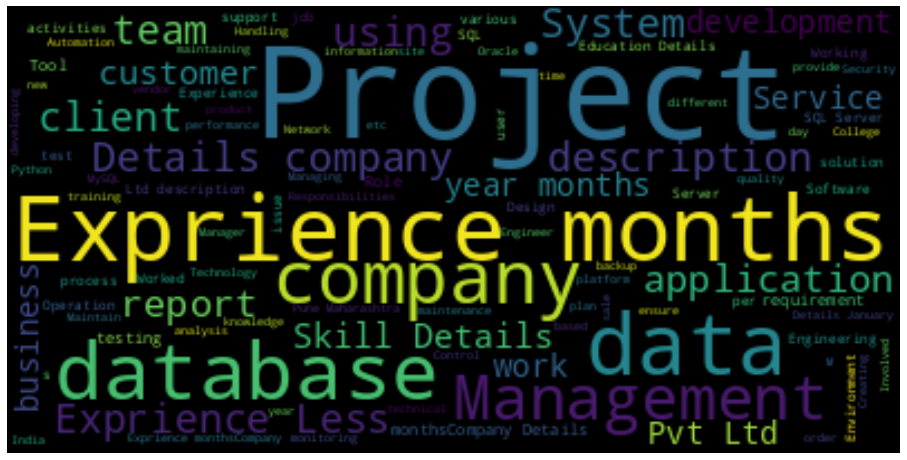

In [127]:
word_cloud = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(16,16))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [128]:
from sklearn.preprocessing import LabelEncoder

In [129]:
data1 = ['Category']
le = LabelEncoder()
for i in data1:
    data[i] = le.fit_transform(data[i])

In [130]:
data.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [131]:
data.tail()

,Category,Resume,cleaned_resume
894,23,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
895,23,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
896,23,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
897,23,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
898,23,Skill Set OS Windows XP/7/8/8.1/10 Database MY...,Skill Set OS Windows XP 7 8 8 1 10 Database MY...


In [132]:
data.Category.value_counts().head()

15    13
7     11
6     10
0     10
12    10
Name: Category, dtype: int64

In [133]:
data.Category.value_counts().tail()

10    5
3     5
18    4
24    4
19    3
Name: Category, dtype: int64

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [135]:
requiredText = data['cleaned_resume'].values
requiredTarget = data['Category'].values
word_vectorizer = TfidfVectorizer(sublinear_tf=True,
                                  stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [136]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,
                                                 requiredTarget,
                                                 random_state=1, 
                                                 test_size=0.2,
                                                 shuffle=True, 
                                                 stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

(132, 7351)
(34, 7351)


In [137]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [138]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

In [139]:
print('KNC Accuracy Training Data: {:.2f}'.format(clf.score(X_train, y_train)))
print('KNC Accuracy Test Data: {:.2f}'.format(clf.score(X_test, y_test)))

KNC Accuracy Training Data: 0.91
KNC Accuracy Test Data: 0.82


In [140]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, 
                                                             metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         2
           8       1.00      0.50      0.67         2
           9       0.67      1.00      0.80         2
          10       0.00      0.00      0.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       0.50      1.00      0.67         1
          14       1.00      1.00      1.00         1
          15       0.75      1.00      0.